In [3]:
#3계층의 신경망으로 MNIST 데이터를 학습하는 코드

import numpy
#시그모이드 함수 expit()사용을 위해 cipy.special 불러오기
import scipy.special
#행렬을 시각화하기 위한 라이브러리
import matplotlib.pyplot
#시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정.
%matplotlib inline

class neuralNetwork:
    #신경망 초기화하기
    def __init__(self, inputnodes, hiddennodes, outputnodes, learning_rate):
        #입력, 은닉, 출력 계층의 노드 개수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        #학습률
        self.lr=learning_rate
        
        #가중치 행렬 wih와 who
        #배열 내 가중치는 w_i_j로 표기. 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        #w11 w21
        #w12 w22 등
        #self.wih= (numpy.random.rand(self.hnodes, self.inodes)-0.5)
        #self.who=(numpy.random.rand(self.onodes, self.hnodes)-0.5)
        self.wih=numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
         
        #활성화 함수로 시그모이드 함수를 이용.
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    def train(self, inputs_list, targets_list):
        #입력 리스트를 2차원의 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=numpy.dot(self.who, hidden_outputs)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        #오차는(실제값-계산값)
        output_errors=targets-final_outputs
        #은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden_errors= numpy.dot(self.who.T, output_errors)
        #은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr*numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        #입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr*numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
      
        pass
    def query(self, inputs_list):
        #입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=numpy.dot(self.who, hidden_outputs)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
        
    

In [13]:
input_nodes=784
hidden_nodes=200
output_nodes=10

learning_rate = 0.1

n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#신경망 학습시키기

#주기(epoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epochs=5
for e in range(epochs):
    #학습데이터 모음 내의 모든 레코드 탐색
    for record in training_data_list:
        #레코드를 쉼표에 의해 분리
        all_values = record.split(',')
        #입력값의 범위와 값 조정
        inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        #결과 값 생성(실제 값인 0.99외에는 모두 0.01)
        targets = numpy.zeros(output_nodes)+0.01
        #all_values[0]은 이 레코드에 대한 결과 값
        targets[int(all_values[0])]=0.99
        n.train(inputs, targets)
        pass
    pass

In [14]:

test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

#신경망 테스트

#신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

#테스트 데이터 모음 내의 모든 레코드 탐색
for  record in test_data_list:
    #레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    #정답은 첫 번째 값
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    #입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    #신경망에 질의
    outputs = n.query(inputs)
    #가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label  =numpy.argmax(outputs)
    print(label, "network's answer")
    #정답 또는 오답을 리스트에 추가
    if(label == correct_label):
        #정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        #정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne

2 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
8

6 correct label
6 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
9 correct label
3 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
4 correct label
6 network's answer
5 correct label
5 ne

3 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
7 correct label
9 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
7

3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
7 correct label
8 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
9

0 correct label
0 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
9 correct label
9 ne

4 network's answer
6 correct label
5 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
7 correct label
4 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
7

4 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
8

8 correct label
8 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
2 correct label
2 ne

9 correct label
9 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7 correct label
1 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
3 correct label
3 ne

2 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
6

9 correct label
9 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
4 correct label
9 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
8 correct label
8 ne

0 correct label
0 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
7 correct label
2 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 ne

5 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
2 network's answer
5

2 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
6

1 correct label
1 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
9 correct label
8 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
9 correct label
7 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
2 correct label
2 ne

1 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
4

2 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
3

0 correct label
0 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
5 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 ne

9 correct label
9 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
2 correct label
2 ne

4 correct label
4 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
7 correct label
7 ne

4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
1 correct label
1 ne

8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
7 correct label
9 ne

In [15]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [16]:
#정답의 비율인 성적을 계산해 출력
scorecard_array= numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum()/scorecard_array.size)

performance =  0.9761


array([1, 2, 3])

100

In [31]:
import matplotlib.pyplot
%matplotlib inline
all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))

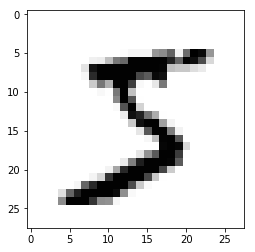

In [34]:
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')